# III. Visualizing Volatility and Return Rates - Poloniex Currencies


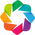

In [1]:
#import matplotlib
import poloniex
import datetime
import holoviews as hv
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from holoviews.operation.timeseries import rolling, rolling_outlier_std
from holoviews.streams import Stream
hv.notebook_extension('bokeh')

In [2]:
end = datetime.datetime.now()
start = end - datetime.timedelta(days=720)
ohlcDataFrames = {}
keysList = ['BTC/USDT',
 'DASH/USDT',
 'LTC/USDT',
 'NXT/USDT',
 'XLM/USDT',
 'XMR/USDT',
 'XRP/USDT',
 'ETH/USDT',
 'ETC/USDT',
 'REP/USDT',
 'ZEC/USDT',
 'BCH/USDT']
newKeysList = []
symbolsList = []
invalidKeys = []
for keys in keysList:
    symbolsList.append(keys.replace('/USDT', ''))
    newKeysList.append('USDT_'+keys.replace('/USDT', ''))
keysList = newKeysList

In [3]:
for keys in keysList:
    try:
        
        ohlcDataFrames[keys] = poloniex.get_ohlc(keys, start, end)
    except ValueError:
        print ("Something went wrong with " + keys +". Moving on.")
        invalidKeys.append(keys)

Something went wrong with USDT_XLM. Moving on.


In [4]:
validKeys = set(keysList)  - set(invalidKeys)
validKeys = list(validKeys)
validKeys

['USDT_BTC',
 'USDT_XMR',
 'USDT_XRP',
 'USDT_NXT',
 'USDT_BCH',
 'USDT_DASH',
 'USDT_LTC',
 'USDT_ZEC',
 'USDT_ETC',
 'USDT_ETH',
 'USDT_REP']

In [5]:
def load_symbol(symbol, **kwargs):
    df = data[symbol]
    #df.reset_index(level=0, inplace=True)

    df['date'] = df.index
    return hv.Curve(df, ('date', 'Date'), ('close', 'Close price'))

symbolsList
data = ohlcDataFrames
data

{'USDT_BCH':                            close         high          low         open  \
 date                                                                      
 2017-08-14 03:30:00   340.000000   600.000000   200.000000   600.000000   
 2017-08-14 03:35:00   310.000000   315.000000   260.000000   309.000000   
 2017-08-14 03:40:00   322.000000   322.000000   309.050000   310.000000   
 2017-08-14 03:45:00   365.000000   399.000000   310.010000   323.865000   
 2017-08-14 03:50:00   595.595000   595.595000   360.000000   360.000000   
 2017-08-14 03:55:00   540.000000   750.000001   400.000000   575.000000   
 2017-08-14 04:00:00   350.000000   540.000000   350.000000   500.000000   
 2017-08-14 04:05:00   390.000000   398.000000   340.000000   370.000000   
 2017-08-14 04:10:00   341.200000   390.000000   341.100000   390.000000   
 2017-08-14 04:15:00   325.000000   341.200000   320.000000   341.100000   
 2017-08-14 04:20:00   350.000000   350.000000   328.865000   328.865000   


In [6]:
%%opts Curve [width=700, height=500, show_grid=True] {+framewise}
def rolling_vol(w, symbol):
    dt = data[symbol]
    S = dt['close'].rolling(w).std()
    dt['Volatility'] = S
    dt['date'] = ohlcDataFrames['USDT_ETH'].index

    return hv.Curve(dt.iloc[-2000:], ('date', 'Date'), ('Volatility','Rolling volatility'))


    
winsize = range(10,60,2)
rvol = hv.DynamicMap(rolling_vol, kdims=['Wsize', 'Symbol']).redim.values(Symbol=validKeys).redim.range(Wsize=(10,60))
rvol

:DynamicMap   [Wsize,Symbol]

In [7]:
type(rolling_vol(10, 'USDT_ETH'))

holoviews.element.chart.Curve

# III.b Return Rates

In [8]:
hvCurves = {}

for keys in validKeys:
    print(keys)
    ohlcDataFrames[keys]['5m_return'] = ohlcDataFrames[keys].close/ohlcDataFrames[keys].close.shift(1) - 1
    ohlcDataFrames[keys]['date'] = ohlcDataFrames[keys].index
list(ohlcDataFrames['USDT_ETH']['date'])

USDT_BTC
USDT_XMR
USDT_XRP
USDT_NXT
USDT_BCH
USDT_DASH
USDT_LTC
USDT_ZEC
USDT_ETC
USDT_ETH
USDT_REP


[Timestamp('2016-02-16 08:10:00'),
 Timestamp('2016-02-16 08:15:00'),
 Timestamp('2016-02-16 08:20:00'),
 Timestamp('2016-02-16 08:25:00'),
 Timestamp('2016-02-16 08:30:00'),
 Timestamp('2016-02-16 08:35:00'),
 Timestamp('2016-02-16 08:40:00'),
 Timestamp('2016-02-16 08:45:00'),
 Timestamp('2016-02-16 08:50:00'),
 Timestamp('2016-02-16 08:55:00'),
 Timestamp('2016-02-16 09:00:00'),
 Timestamp('2016-02-16 09:05:00'),
 Timestamp('2016-02-16 09:10:00'),
 Timestamp('2016-02-16 09:15:00'),
 Timestamp('2016-02-16 09:20:00'),
 Timestamp('2016-02-16 09:25:00'),
 Timestamp('2016-02-16 09:30:00'),
 Timestamp('2016-02-16 09:35:00'),
 Timestamp('2016-02-16 09:40:00'),
 Timestamp('2016-02-16 09:45:00'),
 Timestamp('2016-02-16 09:50:00'),
 Timestamp('2016-02-16 09:55:00'),
 Timestamp('2016-02-16 10:00:00'),
 Timestamp('2016-02-16 10:05:00'),
 Timestamp('2016-02-16 10:10:00'),
 Timestamp('2016-02-16 10:15:00'),
 Timestamp('2016-02-16 10:20:00'),
 Timestamp('2016-02-16 10:25:00'),
 Timestamp('2016-02-

In [10]:
hvCurves = {}
for keys in validKeys:
    print(keys)
    ohlcDataFrames[keys]['5m_return'] = ohlcDataFrames[keys].close/ohlcDataFrames[keys].close.shift(1) - 1
validKeys

USDT_BTC
USDT_XMR
USDT_XRP
USDT_NXT
USDT_BCH
USDT_DASH
USDT_LTC
USDT_ZEC
USDT_ETC
USDT_ETH
USDT_REP


['USDT_BTC',
 'USDT_XMR',
 'USDT_XRP',
 'USDT_NXT',
 'USDT_BCH',
 'USDT_DASH',
 'USDT_LTC',
 'USDT_ZEC',
 'USDT_ETC',
 'USDT_ETH',
 'USDT_REP']

In [11]:
%%opts Curve [width=700, height=500, show_grid=True] {+framewise}
def aux_return_rates(symbol):
    dt = ohlcDataFrames[symbol]
    #print (dt)
    #list(dt)
    #S = dt['close'].rolling(w).std()
    #dt['Volatility'] = S
    #dt['5m_return'] = ohlcDataFrames[symbol]['5m_return']
    #dt['date'] = ohlcDataFrames[symbol].index
    #labell = symbol + ' Returns.'
    return  hv.Curve((dt['5m_return'][-10000:]), ('date', 'Date'),('5m_return', '5m Return rate'), label= 'Returns')
#type(aux_return_rates('USDT_XRP'))
aux_return_rates('USDT_ETH')
rrate = hv.DynamicMap(aux_return_rates, kdims=['Symbol']).redim.values(Symbol=validKeys)
rrate

:DynamicMap   [Symbol]

# V. Sharpe Ratio (Risk to return ratio) for Poloniex Currencies